In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fast_inference import YOLOFastApplier
from os.path import join

In [2]:
images_path = '/sly_task_data/data/' # it could be one image or directory with several images

In [3]:
# inference params
settings = {
  "device_id": 0,
  "gpu_devices": [
    0
  ],
  "min_score_threshold": 0.3,
  "model_classes": {
    "save_classes": "__all__",
    "add_suffix": "_yolo"
  },
  "existing_objects": {
    "save_classes": [],
    "add_suffix": ""
  },
  "mode": {
    "source": "full_image"
  }
}

In [5]:
applier = YOLOFastApplier(settings)

{"message": "Will init all required to inference.", "timestamp": "2018-10-01T17:12:45.440Z", "level": "info"}
{"message": "Read model internal class mapping", "class_mapping": {"person": 0, "bicycle": 1, "car": 2, "motorbike": 3, "aeroplane": 4, "bus": 5, "train": 6, "truck": 7, "boat": 8, "traffic light": 9, "fire hydrant": 10, "stop sign": 11, "parking meter": 12, "bench": 13, "bird": 14, "cat": 15, "dog": 16, "horse": 17, "sheep": 18, "cow": 19, "elephant": 20, "bear": 21, "zebra": 22, "giraffe": 23, "backpack": 24, "umbrella": 25, "handbag": 26, "tie": 27, "suitcase": 28, "frisbee": 29, "skis": 30, "snowboard": 31, "sports ball": 32, "kite": 33, "baseball bat": 34, "baseball glove": 35, "skateboard": 36, "surfboard": 37, "tennis racket": 38, "bottle": 39, "wine glass": 40, "cup": 41, "fork": 42, "knife": 43, "spoon": 44, "bowl": 45, "banana": 46, "apple": 47, "sandwich": 48, "orange": 49, "broccoli": 50, "carrot": 51, "hot dog": 52, "pizza": 53, "donut": 54, "cake": 55, "chair": 56

In [6]:
def get_imgs_list(path):
    if os.path.isdir(path):
        imgs_list = [join(path, fp) for fp in os.listdir(path)]
    else:
        imgs_list = [path]
    return imgs_list

In [7]:
# Get images list
imgs_list = get_imgs_list(images_path)

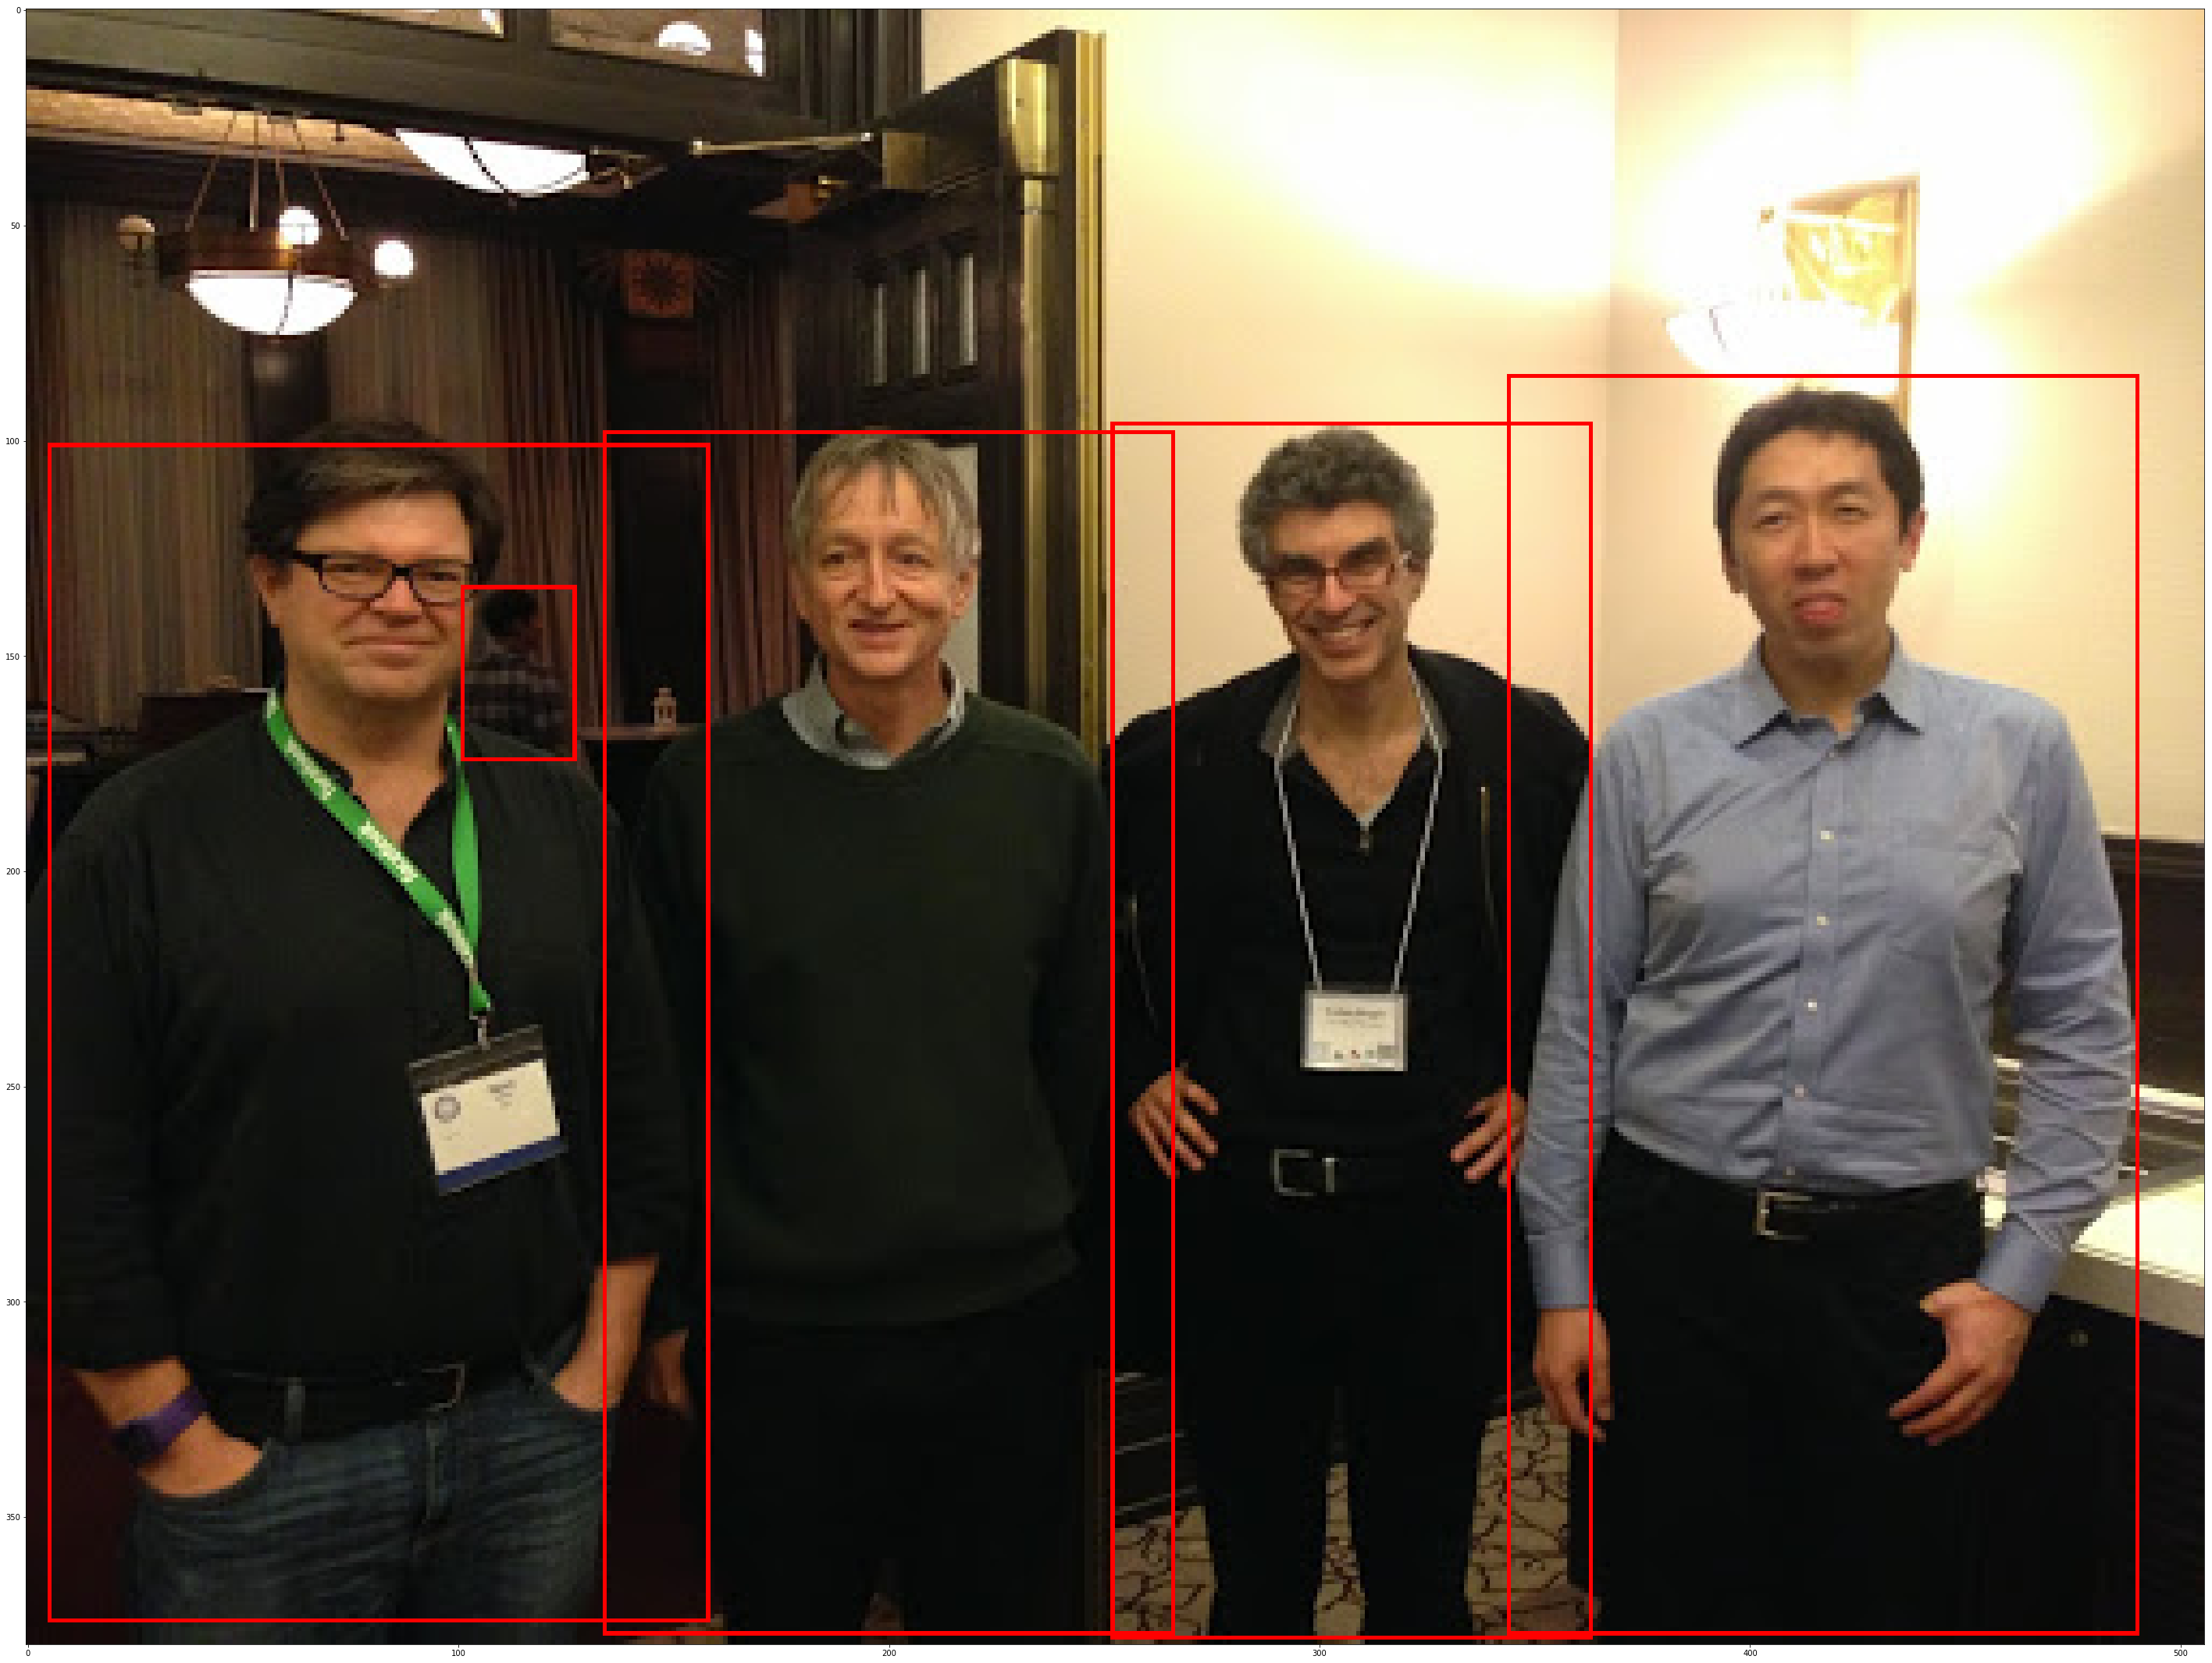

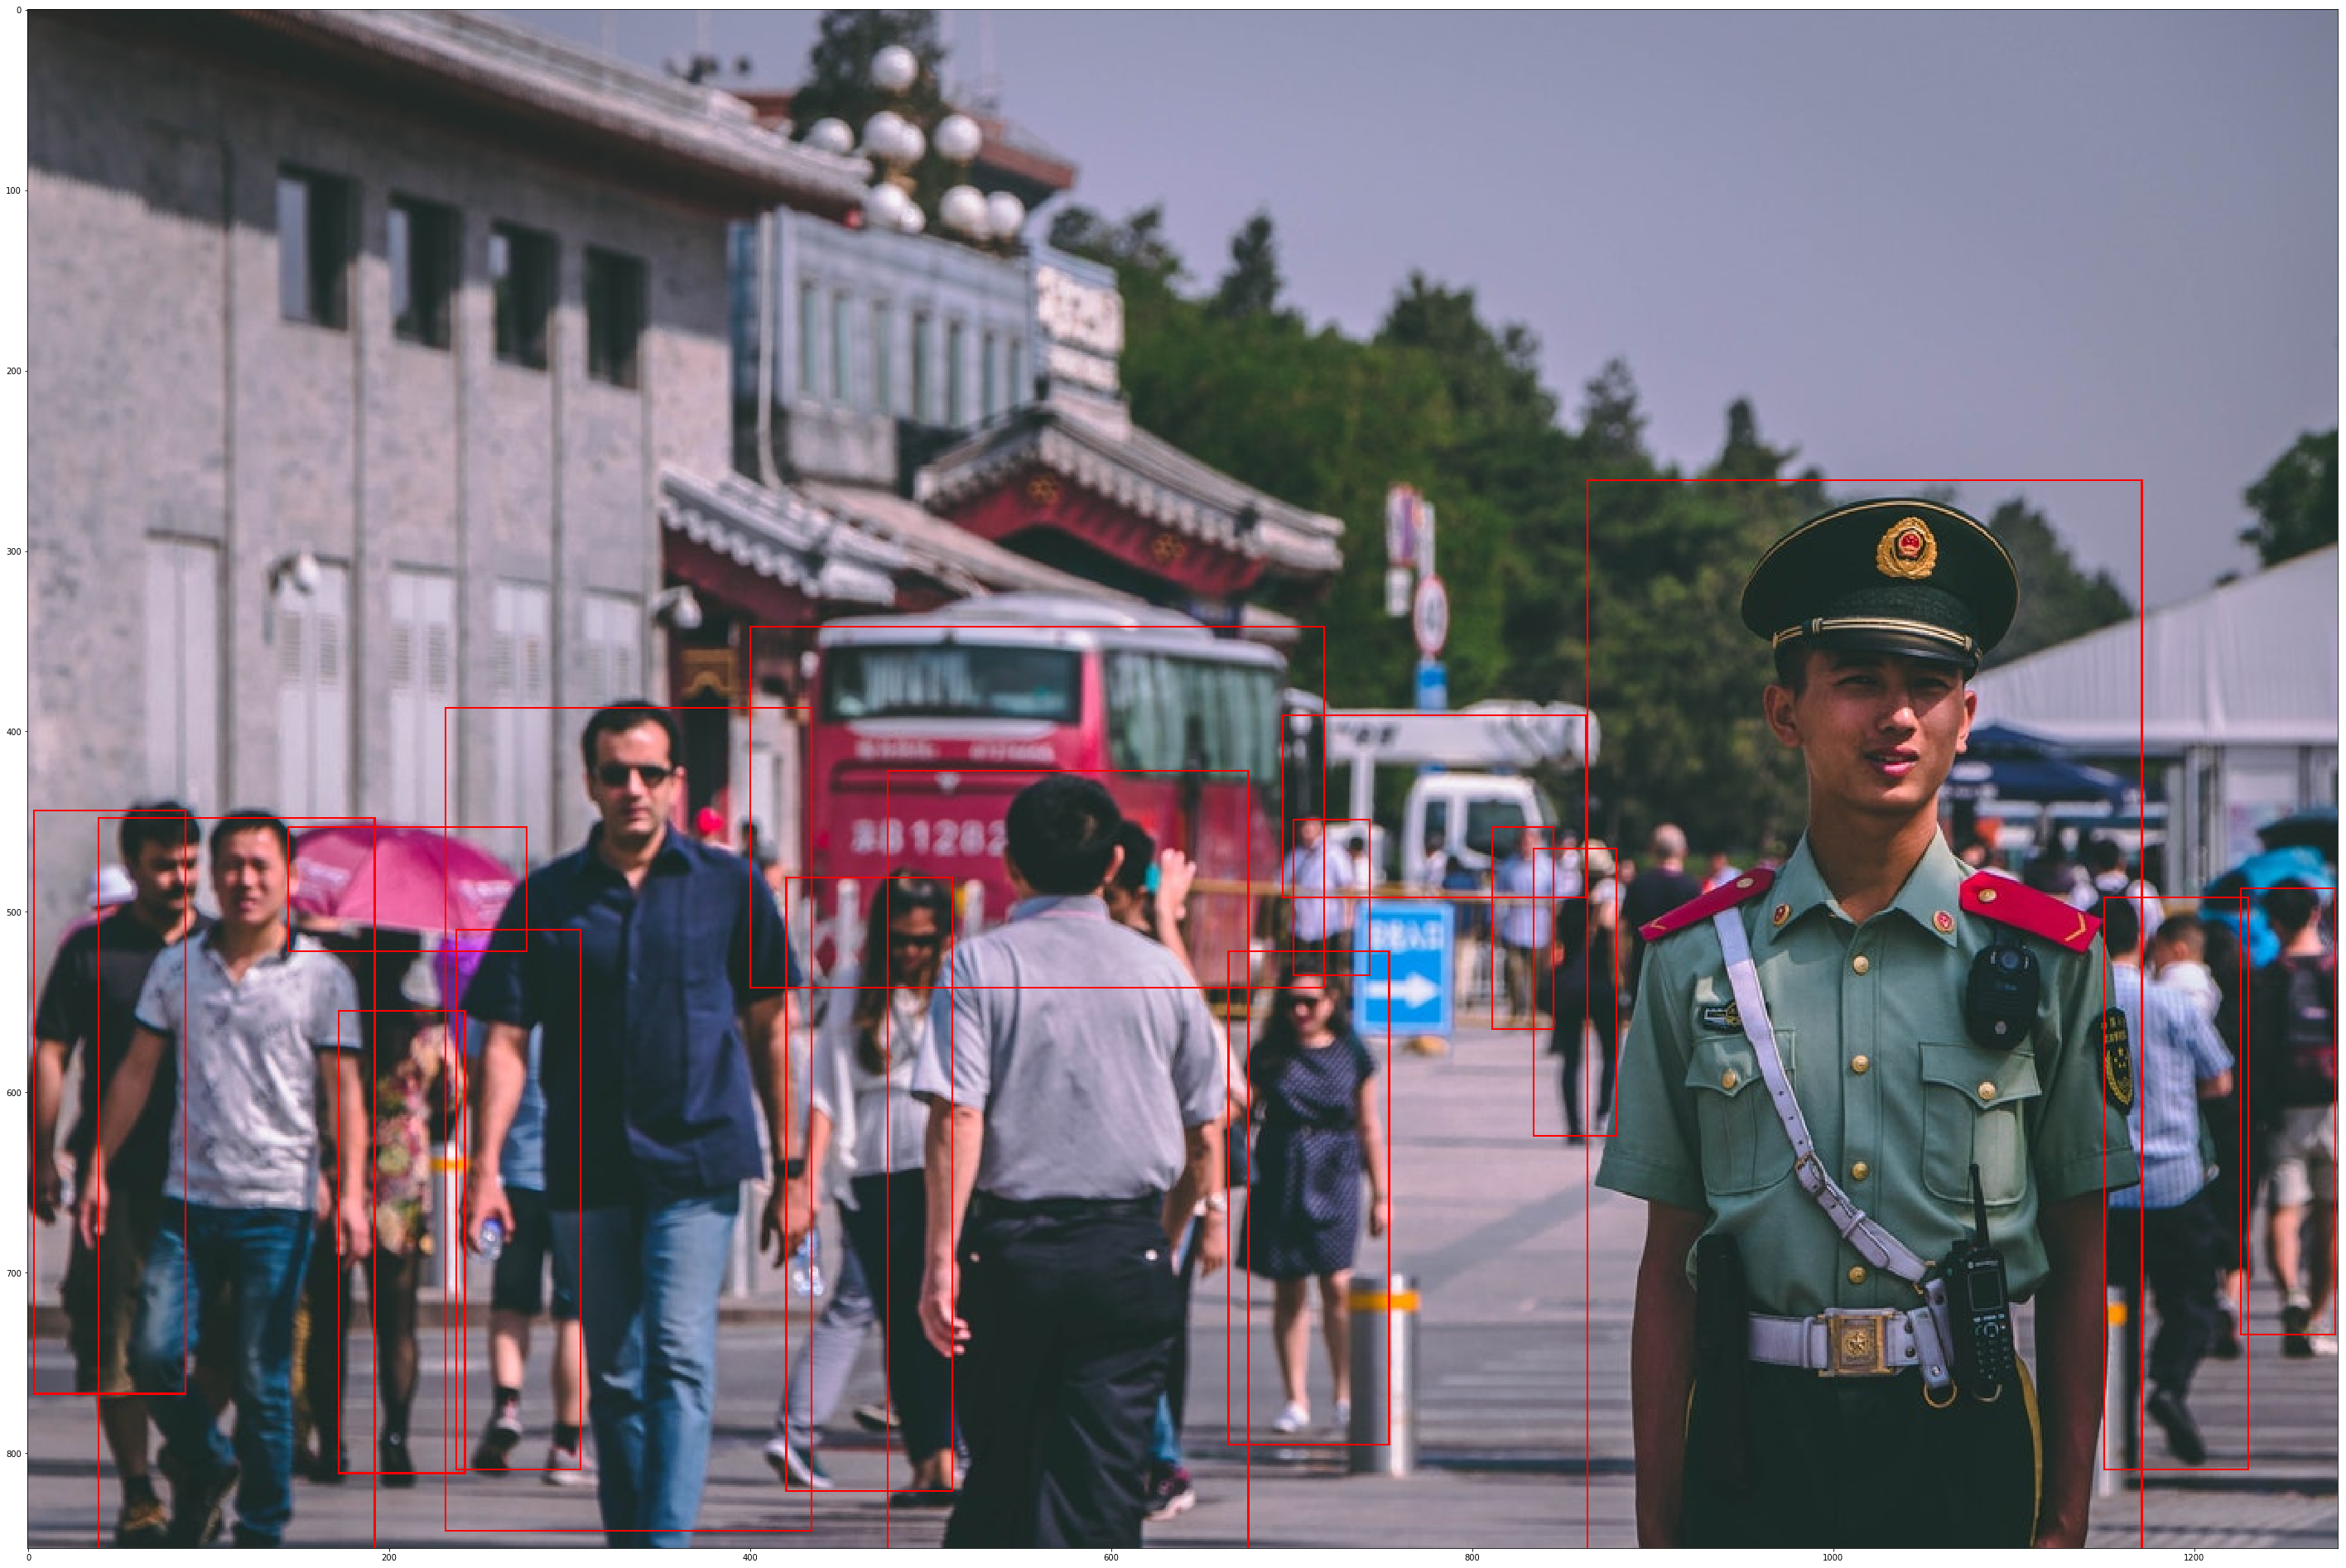

In [8]:
for img_fp in imgs_list:
    image = cv2.imread(img_fp)
    if image is None:
        print('Something wrong with image: {}'.format(img_fp))
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = applier.inference(image)
    for obj in mask["objects"]:
        obj.draw_contour(image, [255,0,0], 1)
    plt.figure(figsize=(50, 50))
    plt.imshow(image)
    plt.show()